## Introduction to ML Lecture 1

In [1]:
import pandas as pd
import numpy as np

In [79]:
# Titanic dataset
df= pd.read_csv("train.csv")
df.head(5)
# goal is to predict the survived people,
# SibSp means num of siblings or spouse in the ship
# Parch number of children 
# Fare means price

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.Embarked.unique()
# shows all the variable value for Embarked

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
df['Embarked'].unique()
# give same results

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
babies = df['Age'] < 2
babies

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [10]:
dfBabies = df[babies]

In [11]:
dfBabies

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [12]:
oldies = df['Age'] > 60 
dfOldies = df[oldies]
dfOldies

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


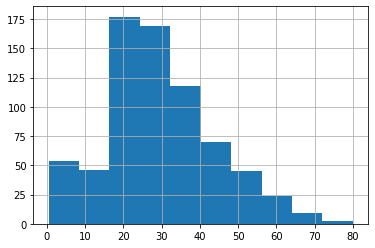

In [13]:
df['Age'].hist()

male      577
female    314
Name: Sex, dtype: int64


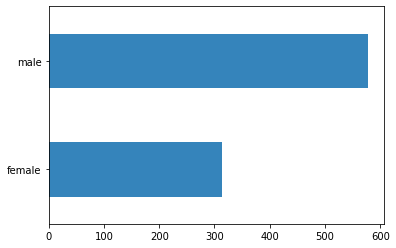

In [14]:
df['Sex'].value_counts().sort_index().plot(kind='barh',alpha = 0.9)
print(df['Sex'].value_counts())

In [15]:
df_survived = df[df.Survived==1]
df_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


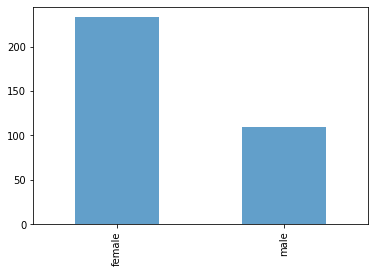

In [16]:
df_survived['Sex'].value_counts().sort_index().plot(kind='bar',alpha=0.7)

In [17]:
numer = df_survived['Sex'].value_counts()
denom = df['Sex'].value_counts()

In [18]:
print(numer)
print(denom)

female    233
male      109
Name: Sex, dtype: int64
male      577
female    314
Name: Sex, dtype: int64


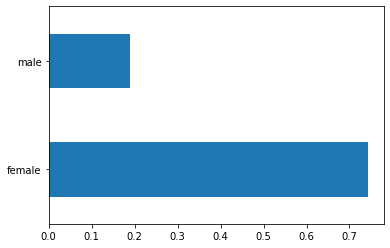

In [19]:
(numer/denom).plot(kind='barh')

In [20]:
nmr = df_survived['Pclass'].value_counts()
nmr

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [21]:
dnm = df['Pclass'].value_counts()
dnm

3    491
1    216
2    184
Name: Pclass, dtype: int64

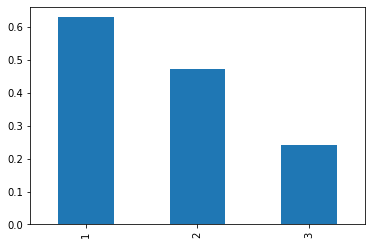

In [22]:
(nmr/dnm).plot(kind="bar")

## Clearing and preparing the data

In [23]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
# df.drop function drop the whole column or row but doesn't change the initial data 
# df.drop(inplace = True), change the initial dataframe

In [26]:
df.drop(['Cabin'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [27]:
df
#we can see that the initial dataframe still has the Cabin column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
df.drop(['Cabin'],axis=1,inplace=True)

In [29]:
df
#initial dataframe changed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [31]:
Ave_age = df['Age'].mean()

In [32]:
Ave_age

29.69911764705882

In [33]:
Ave_age_survived = df_survived['Age'].mean()
Ave_age_survived

28.343689655172415

In [34]:
dfNotSurvived= df[df.Survived== 0]
dfNotSurvived['Age'].mean()

30.62617924528302

In [35]:
# We can see above the difference is insignificant
# Thus we assign the average age to NaN
df['Age'] = df['Age'].fillna(Ave_age)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [37]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [36]:
# Next step, standardization

In [38]:
import sklearn

In [39]:
pd.options.mode.chained_assignment = None

### MinMax Scaling

<font color = 'blue'>
\begin{equation}
x^{'} = \frac{x-\text{min}(x)}{\text{max}(x) - \text{min}(x)}
\end{equation}
</font>

- result is a number in $[0,1]$

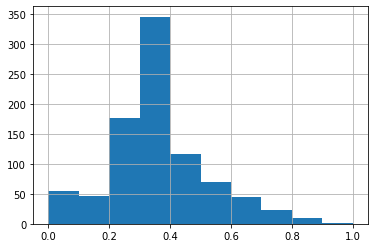

In [40]:
from sklearn.preprocessing import MinMaxScaler
df['AgeMM'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(-1,1))
df.AgeMM.hist()
# The ages distribution is rescaled to be between 0 and 1

### Standardization

<font color = 'blue'>
\begin{equation}
    x^{'} = \frac{x-\text{mean}(x)}{\text{sd}(x)}
\end{equation}
</font>

- result is a number in $[-infinity,infinity]$

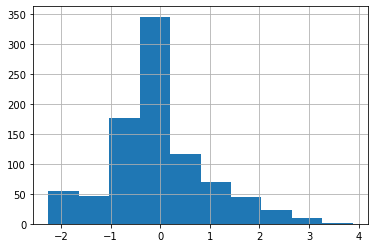

In [41]:
from sklearn.preprocessing import StandardScaler
df['AgeSD'] = StandardScaler().fit_transform(df.Age.values.reshape(-1,1))
df.AgeSD.hist()
# The age distribution now has mean zero and unit variance

In [42]:
# We want convert Embarkation letters to numbers
# Southampton=1, Cherbourg = 2, Queenstown = 3
emb_mapping = {'S':1,'C':2,'Q':3}
df['EmbMap'] = df.Embarked.map(emb_mapping)

In [54]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeMM,AgeSD,EmbMap
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0.271174,-0.590495,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0.472229,0.643971,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0.321438,-0.281878,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0.434531,0.412509,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0.434531,0.412509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0.334004,-0.204724,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0.233476,-0.821957,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0.367921,0.003524,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0.321438,-0.281878,2


In [45]:
# ML algorithms prefer to deal with numerical values
# Convert tect labels to numbers using LabelEncoder
# 根据编号

In [46]:
from sklearn.preprocessing import LabelEncoder

In [80]:
X =df[['Embarked']].values
X

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       [nan],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

## <font color='blue'>**Linear Regression - Normal Equation**

## Some notes
- Use closed-formed (normal equation) to train the regression model making the model parameters that minimize the cost fuction over training set
- Use an iterative optimization approach called GD(Gradient Descent) that gradually tweaks model parameters to minimize the cost function and converges to the closed-form

- normal equation computes the inverse of matrix and the computation complexity of inverting such a matrix is huge(O(n^2.4-3)), using Single Value Decomposition (Used in LinearRegression)is around (O(n^2)). But both can get slow when the number of features grow large.
- Generic algorithm: Gradient Descent measures te local gradient of the error function with regards to the parameter vector $\theta$ and goes in the direction of descending gradient. Once gradient is 0, we have the minimum. Since the MSE function of linear model is a convex function (bowl shape), so we can pick any random initialization on the curve and do not need to worry about local minimum problem. In the case of strange shape of curve (ridge, hole,plateau etc. not convex), there may be local minimum.
-  For GD, if the features are not scaled, it will take longer time to reach minimum. If feature 1 is smaller, it takes a larger change in θ1 to affect the cost function.When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.
- Stochastic GD results in good final parameters but not optimal cause it will still bounce around when it gets close to minimum, although it can escape from local minimum.Note that since instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

In [203]:
np.random.seed(1919)

In [61]:
m = 500
X = np.random.rand(m)
Y = 3 + 4 * X + np.random.randn(m)

Text(0.5, 1.0, 'random points')

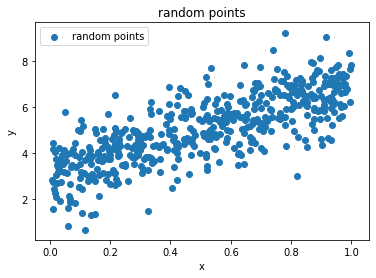

In [107]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X,Y,label='random points')
plt.legend(loc='upper left')
plt.title('random points')


In [63]:
# Use matrix to solve the regression problem
X_b = np.c_[np.ones((m,1)),X]
theta_ols = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
theta_ols

array([3.07746916, 3.89270966])

In [69]:
np.array([[0],[1]])

array([[0],
       [1]])

Text(0, 0.5, 'Y')

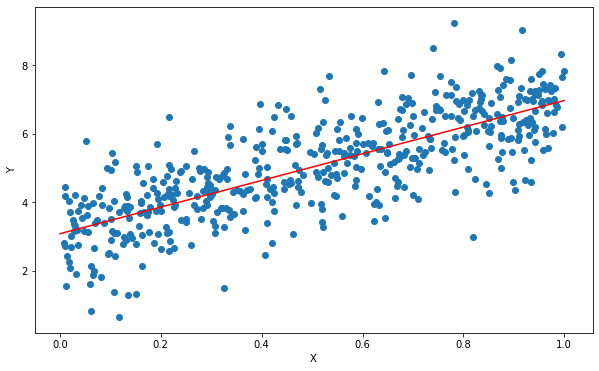

In [72]:
#plot the data with a line through it for x=0 and x=1 
plt.figure(figsize=(10,6))
X_new = np.array([[0],[1]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_ols)
plt.plot(X_new,y_predict,"r-")
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')



In [64]:
from sklearn import linear_model
# Linear_model is a module and LinearRegression is a Class
# Note : LineearRegression class is based on the Scipy.linalg.lstsq()

In [65]:
X = X.reshape(m,1)
X.shape

(500, 1)

In [66]:
regress = linear_model.LinearRegression()
regress.fit(X,Y)
print('intercept:',regress.intercept_,'Coeff:',regress.coef_)

intercept: 3.0774691614930587 Coeff: [3.89270966]


In [97]:
y_predic = regress.predict(X)
print("x=0, y=%.2f"% min(y_predic))
print("x=1,y=%.2f"% max(y_predic))

x=0, y=3.11
x=1,y=6.97


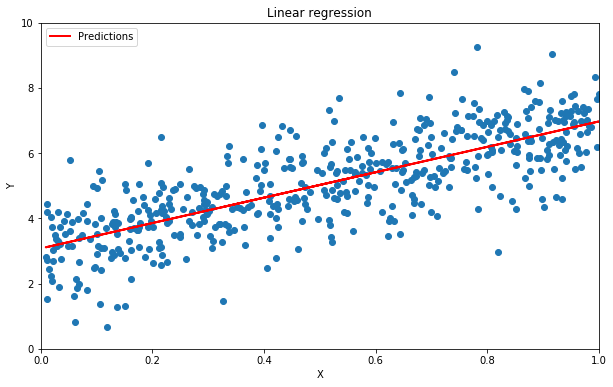

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,y_predic,'r-',linewidth=2,label='Predictions')
plt.xlabel('X',fontsize=10)
plt.ylabel('Y',fontsize=10)
plt.axis([0,1,0,10])
plt.legend(loc='upper left',fontsize=10)
plt.title('Linear regression')
plt.show()

In [127]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %9.3f'% mean_squared_error(Y,y_predic))
print('r_squared: %5.3f'% r2_score(Y,y_predic))
# Look there are no more commas but a % btw the 2 commands
# %_(width or distance)._(decimals)f

MSE:     1.055
r_squared: 0.555


## Two features

In [360]:
m =500
#generate numpoints random uniform points
x1 = 2 * np.random.rand(m)
x2 = 3 * np.random.rand(m)

In [361]:
y_2 = 4 + 3 * x1 - 6 * x2 + np.random.rand(m)

In [362]:
X_2 = np.c_[x1,x2]
X_2.shape

(500, 2)

In [363]:
regress.fit(X_2,y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [364]:
print('Intercept: %.2f'% regress.intercept_)
print('Coefficient:', regress.coef_)

Intercept: 4.50
Coefficient: [ 3.02658669 -6.00962376]


In [365]:
y_2_pre = regress.predict(X_2)

In [366]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'Z')

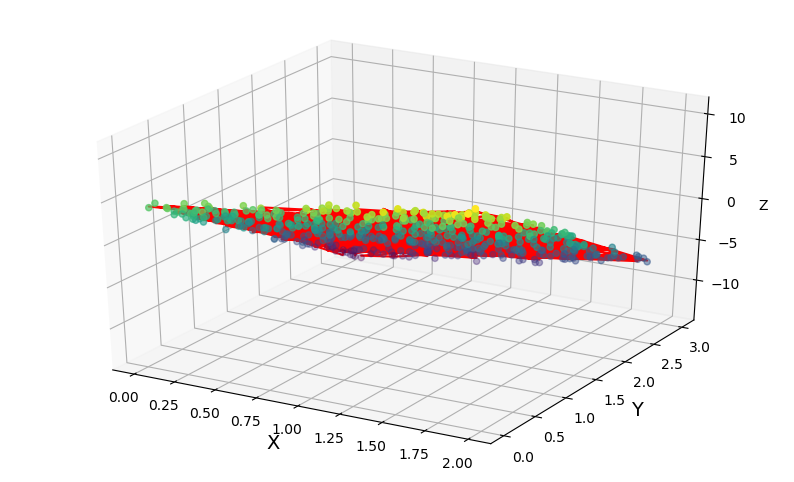

In [367]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.plot3D(x1,x2,y_2_pre,'r-',label='Linear regression 2 features')
ax.scatter3D(x1,x2,y_2,c=y_2_pre)
ax.set_xlabel('X',fontsize=14)
ax.set_ylabel('Y',fontsize=14)
ax.set_zlabel('Z')

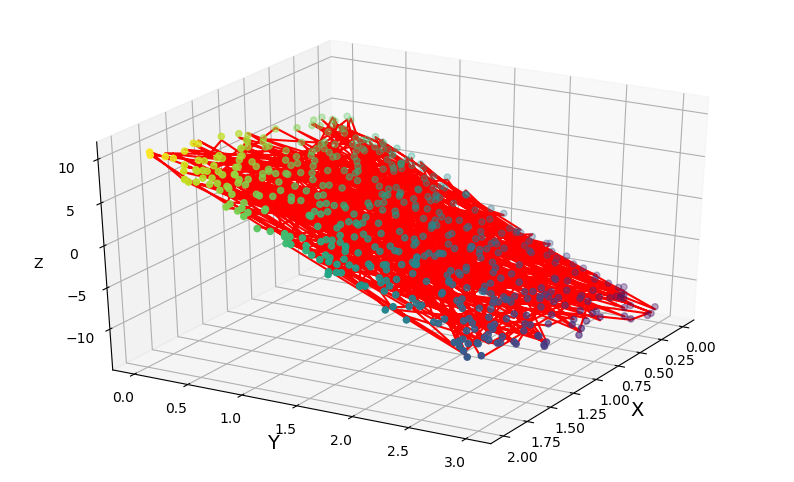

In [372]:
ax.view_init(30,30)
fig

In [373]:
from sklearn.metrics import mean_squared_error,r2_score
# Mean squared error
print("Mean Squared Error: %.2f" % mean_squared_error(y_2,y_2_pre)) 
print("R Squared: %.2f"% r2_score(y_2,y_2_pre))

Mean Squared Error: 0.09
R Squared: 1.00


## <font color='blue'> **Introduction to Gradient Descent Regression** 

### Batch Gradient Descent

In [380]:
m = 200 
# generate numpoints
x = np.random.rand(m)
y =4.0 + 3.0 * x + np.random.rand(m)  

In [325]:
x.shape

(200,)

In [326]:
x = x.reshape(m,1)
x.shape

(200, 1)

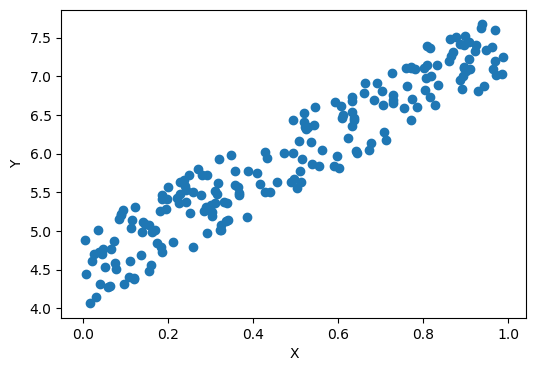

In [327]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(False)
plt.show()

In [1]:
def gradient_descent(alpha, x, y, ftol = 0.00001,max_iter=300):
    """
    ftol: tolerance, the idea is to set the max isteration large as possible and once the gradient vector becomes smaller than ftol, stop iterating.
    """

    converged = False
    num_iter = 0
    m = x.shape[0]

    theta0 = 1
    theta1 = 1
    J = sum([(theta0 + theta1*x[i] - y[i]) ** 2 for i in range(m)])/m/2

    while not converged:
        # for each training sample, compute the gradient wrt t0 and t1
        grad0 = 1/m *sum([(theta0 + theta1*x[i] - y[i]) for i in range(m)])
        grad1 = 1/m * sum([(theta0 + theta1*x[i] - y[i]) * x[i] for i in range(m)])
        temp0 = theta0 - alpha * grad0
        temp1 = theta0 - alpha * grad1
        theta0 = temp0
        theta1 = temp1

        #mean squared error
        e = sum([(theta0 + theta1 * x[i] - y[i])**2 for i in range(m)])/2/m

        if abs(J-e) <= ftol: converged = True
        J = e
        num_iter += 1
        if num_iter == max_iter:
            converged = True
    
    return theta0+theta1*x+J    

alpha = 0.1
theta0, theta1, numIters, e = gradient_descent(alpha,x,y)
print("alpha:",alpha, "t0:",theta0,"t1:",theta1,"J:",e,"NumIters:" ,numIters)

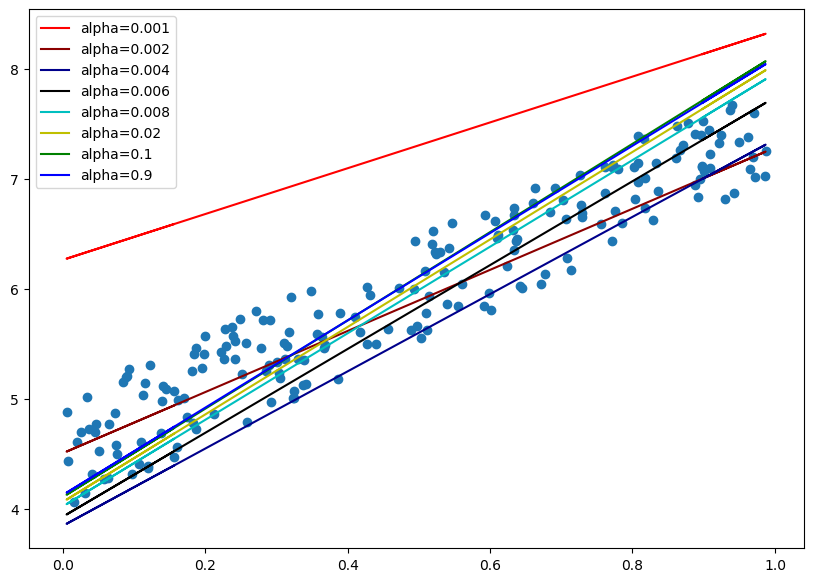

In [341]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.plot(x,gradient_descent(alpha=0.001,x=x,y=y),'r',label='alpha=0.001')
plt.plot(x,gradient_descent(alpha=0.002,x=x,y=y),'darkred',label='alpha=0.002')
plt.plot(x,gradient_descent(alpha=0.004,x=x,y=y),'darkblue',label='alpha=0.004')
plt.plot(x,gradient_descent(alpha=0.006,x=x,y=y),'k',label='alpha=0.006')
plt.plot(x,gradient_descent(alpha=0.008,x=x,y=y),'c',label='alpha=0.008')
plt.plot(x,gradient_descent(alpha=0.02,x=x,y=y),'y',label='alpha=0.02')
plt.plot(x,gradient_descent(alpha=0.1,x=x,y=y),'g',label='alpha=0.1')
plt.plot(x,gradient_descent(alpha=0.9,x=x,y=y),'b',label = 'alpha=0.9')
plt.legend(loc='upper left')

## **Visualize the Gradient Descent Plot**

In [331]:
eta= 0.1 # learning rate
n_iterations = 1000
theta = np.random.rand(2,1) # random initialization
theta.shape

(2, 1)

In [332]:
x.shape

(200, 1)

In [333]:
x_new = np.c_[np.ones((m,1)),x]
x_new.shape

(200, 2)

In [334]:
y=y.reshape(m,1)
y.shape

(200, 1)

In [335]:

for iteration in range(n_iterations):
    gradients = 2/m * x_new.T.dot(x_new.dot(theta) - y)
    theta = theta - eta*gradients

In [336]:
theta.shape

(2, 1)

In [337]:
x_new.dot(theta)

array([[4.98071626],
       [4.98064431],
       [4.68858459],
       [7.09905429],
       [6.3084    ],
       [6.62744511],
       [4.57672799],
       [7.40848291],
       [6.99843018],
       [5.14871532],
       [5.05769429],
       [5.06240593],
       [5.42285437],
       [6.080629  ],
       [5.80378063],
       [5.38403741],
       [6.34043017],
       [4.93142428],
       [5.38676829],
       [5.60815173],
       [5.8757433 ],
       [6.85743779],
       [5.11093575],
       [6.04924281],
       [6.28244733],
       [4.65388377],
       [6.32757965],
       [5.02398485],
       [4.70936947],
       [7.34576921],
       [7.39572255],
       [6.92670517],
       [5.4239626 ],
       [4.80667365],
       [6.5563338 ],
       [5.82826282],
       [4.87935567],
       [5.99239586],
       [4.6179042 ],
       [7.22774985],
       [5.2872444 ],
       [6.49157255],
       [5.44513325],
       [6.06664388],
       [6.14611542],
       [5.06673099],
       [7.40751279],
       [6.827

In [378]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = 200
    plt.plot(x, y, "b.")
    n_iterations = 100
    for iteration in range(n_iterations):
        if iteration < 5:
            y_predict = x_new.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(x_new, y_predict, style)
        gradients = 2/m * x_new.T.dot(x_new.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x$", fontsize=8)
    plt.axis([0, 1, 0, 10])
    plt.title(r"$\eta = {}$".format(eta), fontsize=10)

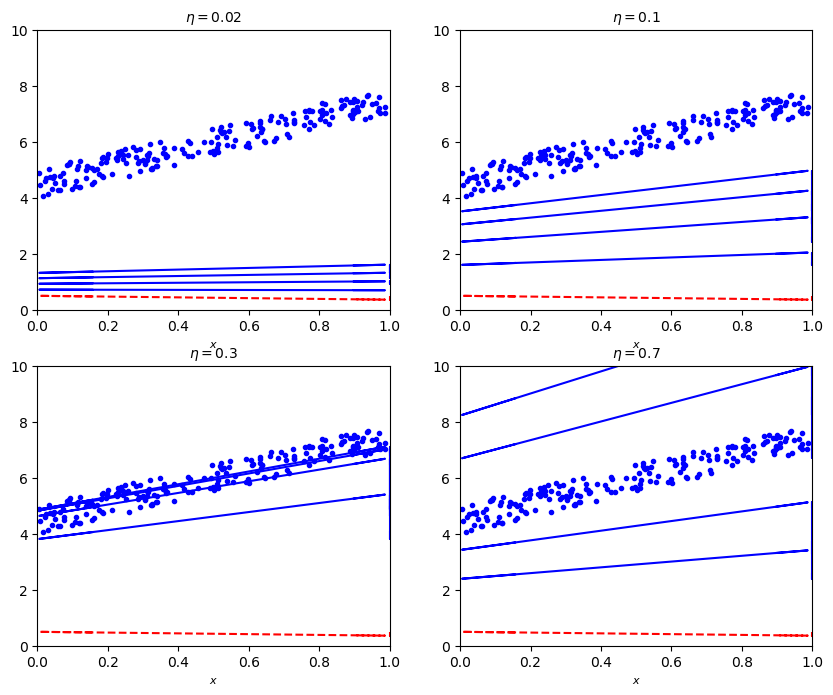

In [379]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,8))
plt.subplot(221); plot_gradient_descent(theta, eta=0.02)
plt.subplot(222); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(223); plot_gradient_descent(theta, eta=0.3)
plt.subplot(224); plot_gradient_descent(theta, eta=0.7)
plt.show()

## Use scikit Stocastic Gradient Descent Regressor

- unlike BGD which updates the thetas by itering through the x and y; SGD randomly choose the x and y and compute the thetas

In [351]:
from sklearn.linear_model import SGDRegressor

In [352]:
sgd = SGDRegressor(max_iter=10000,warm_start=False,penalty=None,learning_rate='constant',eta0=0.0005,tol=None)

In [353]:
sgd.fit(x,y)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [354]:
sgd.coef_

array([2.98300449])

In [355]:
sgd.intercept_

array([4.51545606])

In [359]:
sgd.n_iter_

10000

Text(0.5, 1.0, '$\\eta = 0.0004975619464623346$')

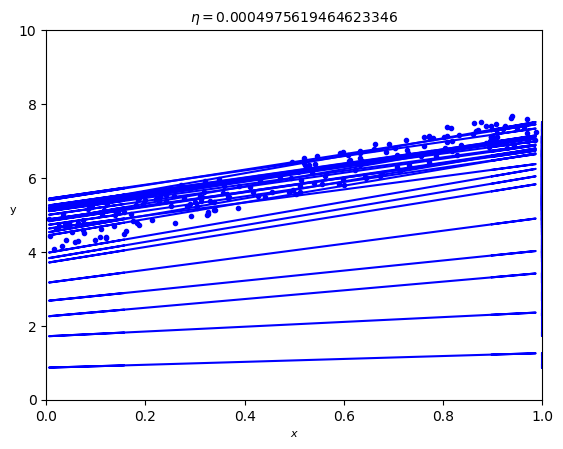

In [384]:
n_epochs = 50
t0,t1 = 5,50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.rand(2,1)
m=200

theta_path_sgd = []
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 30:
            y_predict = x_new.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(x_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = x_new[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(x,y,"b.")
plt.xlabel("$x$", fontsize=8)
plt.ylabel("y",rotation=0,fontsize=8)
plt.axis([0, 1, 0, 10])
plt.title(r"$\eta = {}$".format(eta), fontsize=10)

In [385]:
theta

array([[ 5.98098574],
       [-0.09133853]])